# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://urldefense.com/v3/__https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).*5Cn__;JQ!!Mih3wA!WS4Qn-e2vEKtQ0f1rzdgTr84OJx2LGljGKqWAvqSbgE58wVk4Kly9aTkFJd03ZCe$ 
A data dictionary is available at this [article](https://urldefense.com/v3/__https://www.sciencedirect.com/science/article/pii/S2352340918307182__;!!Mih3wA!WS4Qn-e2vEKtQ0f1rzdgTr84OJx2LGljGKqWAvqSbgE58wVk4Kly9aTkFLFU1ZKd$ ) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://urldefense.com/v3/__https://python-visualization.github.io/folium/__;!!Mih3wA!Tmp2nNSYhv1x0p_zaoyyiio8NFoaKb-BuYaHi3T_6x7umkGTVi4hPwecNtmpWGXR$ ) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
The dataset consisted of various geo location data with causes, population, and power outage data. Looking through the various columns in the set, we found the relationship between power outage durations of rural and urban to be quite interesting. 
Question: Is there a similarity in outage duration in urban areas vs rural areas?

Null Hypothesis: Urban and rural areas see similar outage durations as rural areas.

Alternative Hypothesis: Urban areas tend to have longer outages than rural areas. 

### Cleaning and EDA
To begin we read in the excel file outage as a pandas dataframe. After reading in the file, we drop the units row and the columns for variables and OBS. Units and variables can be found using the data dictionary available with the dataset and is not needed in the dataframe. The OBS column is replaced by the index of the dataframe and also not needed.
   
With the dataframe setup, we then combine columns OUTAGE.START.DATE and OUTAGE.START.TIME into an OUTAGE.START column using datetime objects. Likewise, columns OUTAGE.RESTORATION.DATE and OUTAGE.RESTORATION.TIME are combined into OUTAGE.RESTORATION.

Then we can do some univariate and bivariate analysis on the data and look at statistics and aggregates.

Finally we filter and clean the values that we need to test our hypothesis by aggregating columns and removing null values.

The interesting aggregates we found revolved mostly around the relationships between "outage duration" and various other column values such as "population count" and "climate region".

### Assessment of Missingness
Using a permutation test and the TVD, we assess the missingness of OUTAGE.DURATION based on CLIMATE.REGION and CLIMATE.CATEGORY to see how the missingness of OUTAGE.DURATION is based on the climate of the outage. We then also assess the missingness of CUSTOMERS.AFFECTED based on CLIMATE.CATEGORY. 

### Hypothesis Test
Question:Is there a correleation between urban areas and duration of outages. 
We used the difference of means test statistic to run a permutation test which allows us to randomly shuffle the groups and randomly assign durations to see any trends in the distributions. The urban and rural populations were differentiated using the average urban population as threshold where values below mean are labelled as urban while values greater were labelled as rural. After performing the permutation test we got a p-value of 0.86 which is less than the standard 0.05 significance value. Therefore we can conclude that we failed to reject the null hypothesis and that the correlation  between outage duration and urban areas is merely due to chance. 

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [2]:
# load in the dataset
outages = pd.read_excel('outage', header=5)
outages

,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,numeric,NaN,...,%,%,persons per square mile,persons per square mile,persons per square mile,%,%,%,%,%
1,NaN,1.0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
2,NaN,2.0,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
3,NaN,3.0,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
4,NaN,4.0,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,NaN,1530.0,2011.0,12.0,North Dakota,ND,MRO,West North Central,-0.9,cold,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177
1531,NaN,1531.0,2006.0,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177
1532,NaN,1532.0,2009.0,8.0,South Dakota,SD,RFC,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226
1533,NaN,1533.0,2009.0,8.0,South Dakota,SD,MRO,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226


### Cleaning and EDA

To begin cleaning we will be removing unecessary rows and columns and combining date and time columns

In [3]:
# dropping unecessary rows and columns

outages = outages.drop(0)
outages = outages.drop(['variables', 'OBS'], axis=1)

In [4]:
# combine OUTAGE.START.DATE and OUTAGE.START.TIME

outages['OUTAGE.START.DATE'] = pd.to_datetime(outages['OUTAGE.START.DATE'], format='%Y-%m-%d').dt.date
outages['OUTAGE.START.TIME'] = pd.to_datetime(outages['OUTAGE.START.TIME'], format='%H:%M:%S').dt.time

outages['OUTAGE.START'] = pd.to_datetime(outages['OUTAGE.START.DATE'].astype(str) + ' ' + outages['OUTAGE.START.TIME'].astype(str), errors='coerce')
outages = outages.drop(['OUTAGE.START.DATE', 'OUTAGE.START.TIME'], axis=1)

In [5]:
# combine OUTAGE.RESTORATION.DATE and OUTAGE.RESTORATION.TIME

outages['OUTAGE.RESTORATION.DATE'] = pd.to_datetime(outages['OUTAGE.RESTORATION.DATE'], format='%Y-%m-%d').dt.date
outages['OUTAGE.RESTORATION.TIME'] = pd.to_datetime(outages['OUTAGE.RESTORATION.TIME'], format='%H:%M:%S').dt.time

outages['OUTAGE.RESTORATION'] = pd.to_datetime(outages['OUTAGE.RESTORATION.DATE'].astype(str) + ' ' + outages['OUTAGE.RESTORATION.TIME'].astype(str), errors='coerce')
outages = outages.drop(['OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'], axis=1)

Here is the dataframe after the data-cleaning process

In [6]:
outages.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,...,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
1,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2011-07-01 17:00:00,2011-07-03 20:00:00
2,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2014-05-11 18:38:00,2014-05-11 18:39:00
3,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-10-26 20:00:00,2010-10-28 22:00:00
4,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2012-06-19 04:30:00,2012-06-20 23:00:00
5,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,...,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-07-18 02:00:00,2015-07-19 07:00:00


Next we can do some univariate and bivariate analysis of the data looking at some statistics

In [7]:
# Univariate Analysis

average_outage_time = outages['OUTAGE.DURATION'].mean()
print('Average Outage Time: ', round((average_outage_time / 60), 2), ' hours')

shortest_outage_time = outages['OUTAGE.DURATION'].min()
print('Shortest Outage Time: ', round((shortest_outage_time / 60), 2), ' hours')

short_outages = len(outages[outages['OUTAGE.DURATION'] <= 5])
print('Number of Outages Under 5 min: ', str(short_outages))

longest_outage_time = outages['OUTAGE.DURATION'].max()
print('Longest Outage Time: ', round((longest_outage_time / 60), 2), ' hours')

most_common_cause = outages['CAUSE.CATEGORY'].value_counts().idxmax()
most_common_cause_detail = outages.loc[outages['CAUSE.CATEGORY']==most_common_cause]['CAUSE.CATEGORY.DETAIL'].value_counts().idxmax()
print('Most common cause of outage: ', most_common_cause_detail)

average_people_affected = outages['CUSTOMERS.AFFECTED'].mean()
print('Average Number of People Effected: ',  average_people_affected)


Average Outage Time:  43.76  hours
Shortest Outage Time:  0.0  hours
Number of Outages Under 5 min:  195
Longest Outage Time:  1810.88  hours
Most common cause of outage:  thunderstorm
Average Number of People Effected:  143456.22273143905


In [8]:
# finding the most common CLIMATE.CATEGORY (not normal) by CLIMATE.REGION

climate = outages[outages['CLIMATE.CATEGORY'] != 'normal']
region_category = climate.groupby('CLIMATE.REGION')['CLIMATE.CATEGORY'].agg(pd.Series.mode)
region_category

CLIMATE.REGION
Central               cold
East North Central    cold
Northeast             cold
Northwest             cold
South                 warm
Southeast             cold
Southwest             cold
West                  cold
West North Central    cold
Name: CLIMATE.CATEGORY, dtype: object

In [9]:
# finding the average number of CUSTOMERS.AFFECTED based on duration of outage

bins = 4
labels =['short', 'medium short', 'medium long', 'long']
df = outages.copy()
df['OUTAGE.DURATION Bins'] = pd.cut(df['OUTAGE.DURATION'].dropna(), bins, labels=labels)
df.groupby('OUTAGE.DURATION Bins')['CUSTOMERS.AFFECTED'].mean()

OUTAGE.DURATION Bins
short           140278.388202
medium short    951009.200000
medium long               NaN
long                      NaN
Name: CUSTOMERS.AFFECTED, dtype: float64

In [10]:
# finding the number of CUSTOMERS.AFFECTED records based on duration of outage
# here it seems like longer outage duration do not have CUSTOMERS.AFFECTED recorded

bins = 4
labels =['short', 'medium short', 'medium long', 'long']
df = outages.copy()
df['OUTAGE.DURATION Bins'] = pd.cut(df['OUTAGE.DURATION'].dropna(), bins, labels=labels)
df.groupby('OUTAGE.DURATION Bins')['CUSTOMERS.AFFECTED'].count()

OUTAGE.DURATION Bins
short           1051
medium short       5
medium long        0
long               0
Name: CUSTOMERS.AFFECTED, dtype: int64

Next we will be looking at the missingness in the data

In [11]:
# remove null values
pd.options.mode.chained_assignment = None
outage_duration= outages[outages['OUTAGE.DURATION'].notna()]
outage_duration["OUTAGE.DURATION"]=outage_duration["OUTAGE.DURATION"].astype('int64')
outage_types = outage_duration.dtypes
outage_types

YEAR                            float64
MONTH                           float64
U.S._STATE                       object
POSTAL.CODE                      object
NERC.REGION                      object
CLIMATE.REGION                   object
ANOMALY.LEVEL                    object
CLIMATE.CATEGORY                 object
CAUSE.CATEGORY                   object
CAUSE.CATEGORY.DETAIL            object
HURRICANE.NAMES                  object
OUTAGE.DURATION                   int64
DEMAND.LOSS.MW                   object
CUSTOMERS.AFFECTED              float64
RES.PRICE                        object
COM.PRICE                        object
IND.PRICE                        object
TOTAL.PRICE                      object
RES.SALES                        object
COM.SALES                        object
IND.SALES                        object
TOTAL.SALES                      object
RES.PERCEN                       object
COM.PERCEN                       object
IND.PERCEN                       object


In [12]:
# average outage duration by climate region
outage_duration.groupby(['CLIMATE.REGION'])['OUTAGE.DURATION'].mean().sort_values(ascending=False)

CLIMATE.REGION
East North Central    5352.043796
Northeast             2991.656977
South                 2846.100917
Central               2701.130890
Southeast             2217.686667
West                  1628.331707
Southwest             1566.136364
Northwest             1284.500000
West North Central     696.562500
Name: OUTAGE.DURATION, dtype: float64

In [13]:
# 
outage_duration['POPPCT_URBAN'].astype(str).astype(float)

1       73.27
2       73.27
3       73.27
4       73.27
5       73.27
        ...  
1527    70.58
1529    70.58
1530    59.90
1532    56.65
1533    56.65
Name: POPPCT_URBAN, Length: 1476, dtype: float64

In [14]:
# average outage duration by urban population count
urban= outage_duration.groupby(['POPPCT_URBAN'])['OUTAGE.DURATION'].mean().sort_values(ascending=True)
urban

POPPCT_URBAN
64.76       33.333333
38.90       35.444444
55.89       54.000000
49.35       84.000000
56.65      120.000000
77.43      140.375000
83.30      144.925000
90.58      250.219512
60.30      279.642857
70.58      414.625000
94.20      553.285714
59.90      720.000000
81.03      766.680000
91.93      845.400000
86.15      901.071429
91.97      944.166667
66.39     1041.967742
75.45     1051.194444
38.66     1097.055556
59.04     1152.800000
87.99     1278.833333
75.07     1345.411765
66.09     1457.282051
84.05     1508.146067
56.16     1514.360000
88.49     1602.454545
94.95     1666.338384
87.20     2313.086207
73.13     2455.750000
84.70     2704.819672
73.27     2727.933333
77.92     2867.857143
66.24     3019.090909
66.33     3135.000000
70.44     3374.066667
72.44     3521.642857
78.66     3811.701754
73.19     4084.552632
91.16     4094.666667
100.00    4303.600000
74.20     4376.285714
94.68     4450.906250
89.81     4552.920000
64.02     4793.750000
58.38     5093.9230

In [15]:
# average urban population 
urban_population = outage_duration['POPPCT_URBAN'].mean()
urban_population

80.94572493224909

In [16]:
#distinguish between urban/non-urban population using "urban_population" as threshold
outage_duration['IS_URBAN'] = outage_duration['POPPCT_URBAN']. apply(lambda x: True if x>urban_population else False)
outage_duration['IS_URBAN']

1       False
2       False
3       False
4       False
5       False
        ...  
1527    False
1529    False
1530    False
1532    False
1533    False
Name: IS_URBAN, Length: 1476, dtype: bool

In [17]:
#"is_urban" gives if a certain outage is in an urban area or not
outage_duration.head(10)

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,...,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION,IS_URBAN
1,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2011-07-01 17:00:00,2011-07-03 20:00:00,False
2,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2014-05-11 18:38:00,2014-05-11 18:39:00,False
3,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-10-26 20:00:00,2010-10-28 22:00:00,False
4,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2012-06-19 04:30:00,2012-06-20 23:00:00,False
5,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-07-18 02:00:00,2015-07-19 07:00:00,False
6,2010.0,11.0,Minnesota,MN,MRO,East North Central,-1.4,cold,severe weather,winter storm,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-11-13 15:00:00,2010-11-14 22:00:00,False
7,2010.0,7.0,Minnesota,MN,MRO,East North Central,-0.9,cold,severe weather,tornadoes,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-07-17 20:30:00,2010-07-19 22:00:00,False
8,2005.0,6.0,Minnesota,MN,MRO,East North Central,0.2,normal,severe weather,thunderstorm,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2005-06-08 04:00:00,2005-06-10 22:00:00,False
9,2015.0,3.0,Minnesota,MN,MRO,East North Central,0.6,warm,intentional attack,sabotage,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-03-16 07:31:00,2015-03-16 10:06:00,False
10,2013.0,6.0,Minnesota,MN,MRO,East North Central,-0.2,normal,severe weather,hailstorm,...,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2013-06-21 17:39:00,2013-06-24 06:00:00,False


In [18]:
# group "is_urban" and "outage.duration"
uout_duration = outage_duration[['OUTAGE.DURATION', 'IS_URBAN']]
x=uout_duration[uout_duration['IS_URBAN']==True]["OUTAGE.DURATION"].mean() #avg urban outage durations
y=uout_duration[uout_duration['IS_URBAN']==False]["OUTAGE.DURATION"].mean() #avg rural outage duration
print(x,y)

2323.765389082462 3047.6845528455283


In [19]:
# average outage duration for "False":"Rural" and "True":"Urban"
uout_duration.groupby('IS_URBAN').mean()

,OUTAGE.DURATION
IS_URBAN,
False,3047.684553
True,2323.765389


In [20]:
uout_duration['OUTAGE.DURATION']

1       3060
2          1
3       3000
4       2550
5       1740
        ... 
1527       0
1529     220
1530     720
1532      59
1533     181
Name: OUTAGE.DURATION, Length: 1476, dtype: int64

IS_URBAN
Rural    AxesSubplot(0.125,0.125;0.775x0.755)
Urban    AxesSubplot(0.125,0.125;0.775x0.755)
Name: OUTAGE.DURATION, dtype: object

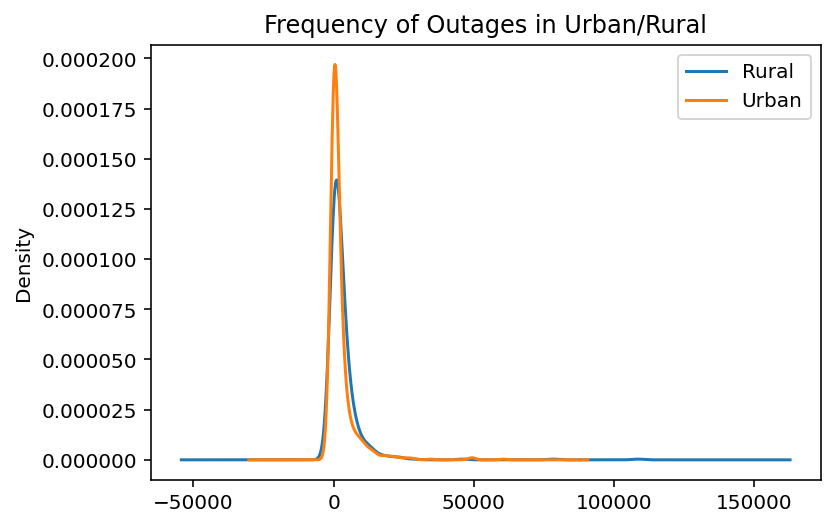

In [21]:
#remove outage durations==0 as 0 indicates no outage 
uout_duration = uout_duration[uout_duration['OUTAGE.DURATION']!=0]
r_u=uout_duration.copy()
urban_rural=uout_duration["IS_URBAN"].apply(lambda x:"Rural" if x==False else "Urban" )
r_u["IS_URBAN"]=urban_rural
title = 'Frequency of Outages in Urban/Rural'
(
r_u.groupby('IS_URBAN')['OUTAGE.DURATION'] .plot(kind='density',legend=True, subplots=False, title=title)
) #density graph shows greater number of outages in urban areas

In [22]:
#major causes of outages
outage_duration.groupby('CAUSE.CATEGORY')['OUTAGE.DURATION'].mean() .sort_values(ascending=False)

CAUSE.CATEGORY
fuel supply emergency            13484.026316
severe weather                    3883.985215
equipment failure                 1816.909091
public appeal                     1468.449275
system operability disruption      728.869919
intentional attack                 429.980149
islanding                          200.545455
Name: OUTAGE.DURATION, dtype: float64

### Assessment of Missingness

In this section we will begin by assesing the missingness of OUTAGE.DURATION based on CLIMATE.REGION and CLIMATE.CATEGORY.

To begin we select the columns that we will be comparing. In the original dataset, all of these columns have missing values.

In [23]:
outages_missing = outages[['CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CUSTOMERS.AFFECTED', 'OUTAGE.DURATION']]
outages_missing.isna().any()

CLIMATE.REGION        True
CLIMATE.CATEGORY      True
CUSTOMERS.AFFECTED    True
OUTAGE.DURATION       True
dtype: bool

To asses missingness, we will be using a permutation test with the TVD as our test statistic. To start we will be using this fucntion to calculate the TVD where:

- df is the dataframe with the columns that we are testing
- column is the column without missing values
- test_column is the column with missing values
- n is the number of permuations to test

We will be using a significance level of 0.05 for our tests.

In [24]:
def calculate_tvd(df, column, test_column, n):
    
    tvds = []
    
    for _ in range(n):

        # shuffle
        shuffled_types = (df[column].sample(replace=False, frac=1).reset_index(drop=True))

        # update the table
        shuffled = (df.assign(**{'Shuffled CATEGORY': shuffled_types}))

        # compute the tvd
        shuffed_emp_distributions = (shuffled.pivot_table(columns=test_column, index='Shuffled CATEGORY', values=None, aggfunc='size').fillna(0).apply(lambda x:x/x.sum()))
        tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
        
        # add it to the list of results
        tvds.append(tvd)
    
    return tvds

To begin out assesment, we start by analyzing the analyze the missingness of OUTAGE.DURATION on CLIMATE.REGION.

In [25]:
# create the dataframe with the two columns that we are comparing 
df = outages[['CLIMATE.REGION']].copy().dropna()
df['OUTAGE.DURATION_isnull'] = outages['OUTAGE.DURATION'].isnull()

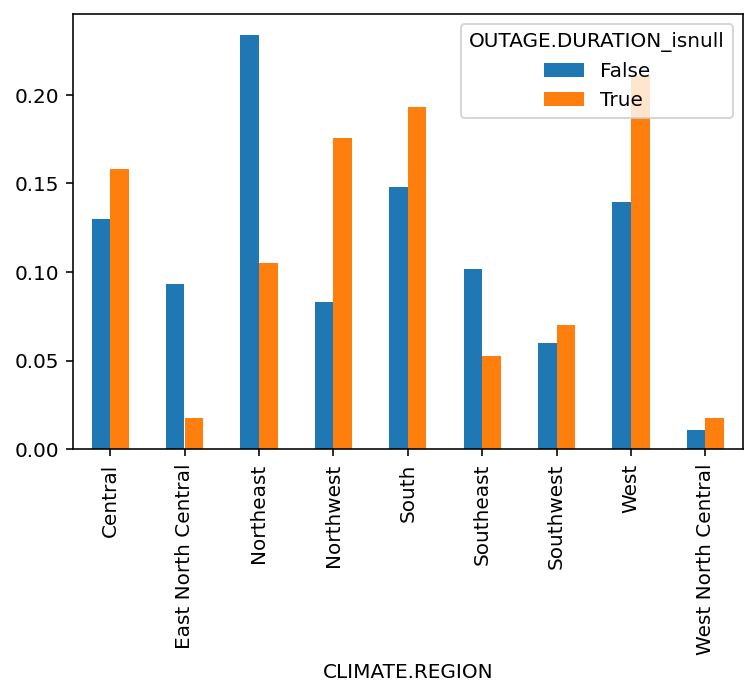

In [26]:
emp_distributions = (df.pivot_table(columns='OUTAGE.DURATION_isnull', index='CLIMATE.REGION', aggfunc='size').fillna(0).apply(lambda x:x / x.sum()))
emp_distributions.plot(kind='bar');

In [27]:
tvds = calculate_tvd(df ,'CLIMATE.REGION', 'OUTAGE.DURATION_isnull', 500)

In [28]:
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.2535212947392274

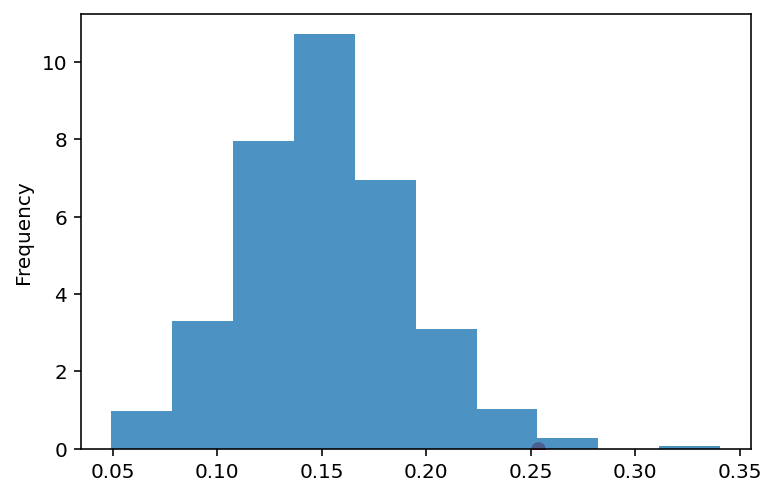

In [29]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

In [30]:
np.count_nonzero(tvds > observed_tvd) / len(tvds)

0.01

With a p-value of ~0.016 and a significance level of 0.05, we can reject the null hypothesis. \
The missingness of OUTAGE.DURATION is dependent on CLIMATE.REGION

Next, we will also be analyzing the missingness of OUTAGE.DURATION on CLIMATE.REGION.

In [31]:
# create the dataframe with the two columns that we are comparing 
df = outages[['CLIMATE.CATEGORY']].copy().dropna()
df['OUTAGE.DURATION_isnull'] = outages['OUTAGE.DURATION'].isnull()

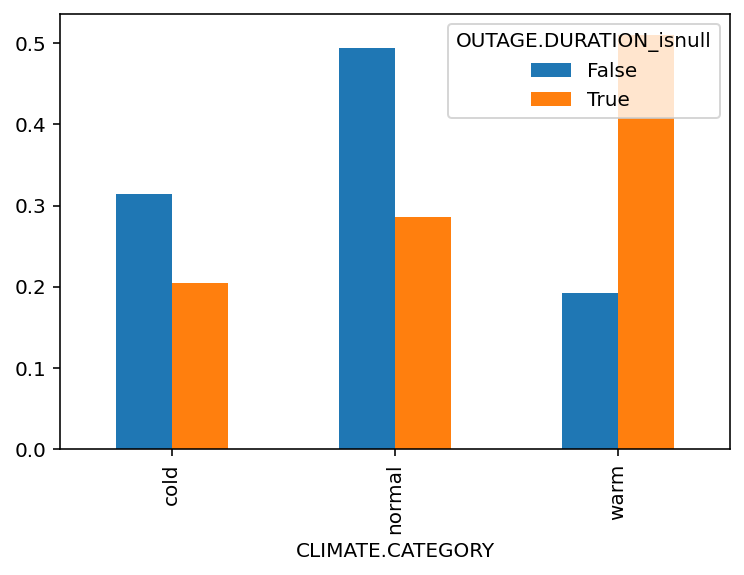

In [32]:
emp_distributions = (df.pivot_table(columns='OUTAGE.DURATION_isnull', index='CLIMATE.CATEGORY', aggfunc='size').fillna(0).apply(lambda x:x / x.sum()))
emp_distributions.plot(kind='bar');

In [33]:
tvds = calculate_tvd(df ,'CLIMATE.CATEGORY', 'OUTAGE.DURATION_isnull', 500)

In [34]:
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.31846966428847967

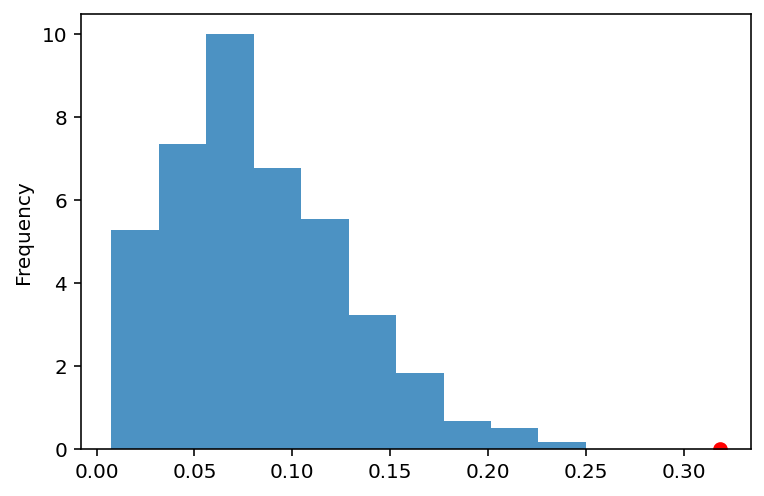

In [35]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

In [36]:
np.count_nonzero(tvds > observed_tvd) / len(tvds)

0.0

With a p-value of ~0.0 and a significance level of 0.05, we can reject the null hypothesis. \
The missingness of OUTAGE.DURATION is dependent on CLIMATE.CATEGORY

What these two tests show us is that the missingness of OUTAGE.DURATION is dependent the climate that the outage happens in. Using the graphs from the previous two tests, it appears that OUTAGE.DURATION is marked null more often in warm climates and regions in the west.

A possible theory for this connection is if outage durations are missing if they outage only occures for a very short time. In the EDA section we discovered that out of 1535 records, there were only 195 outages under 5 min. In warm climates the outage may not last as long since it may be easier to fix. Similarly, outages in regions in the west could be faster to fix due to having a newer power grid.

Finally we'll do a test analyzing the missingness of CUSTOMERS.AFFECTED based on CLIMATE.CATEGORY. 

In [37]:
# create the dataframe with the two columns that we are comparing
df = outages[['CLIMATE.CATEGORY']].copy().dropna()
df['CUSTOMERS.AFFECTED_isnull'] = outages['CUSTOMERS.AFFECTED'].isnull()

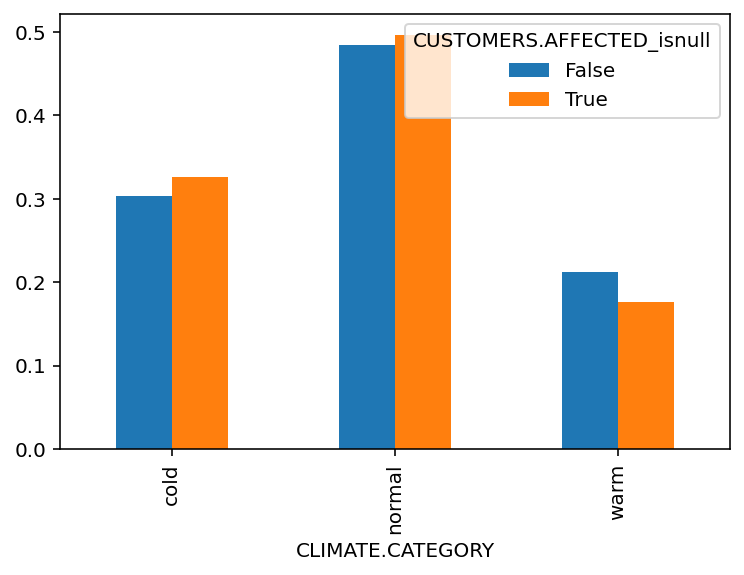

In [38]:
emp_distributions = (df.pivot_table(columns='CUSTOMERS.AFFECTED_isnull', index='CLIMATE.CATEGORY', aggfunc='size').fillna(0).apply(lambda x:x / x.sum()))
emp_distributions.plot(kind='bar');

In [39]:
tvds = calculate_tvd(df ,'CLIMATE.CATEGORY', 'CUSTOMERS.AFFECTED_isnull', 500)

In [40]:
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.03530637347189798

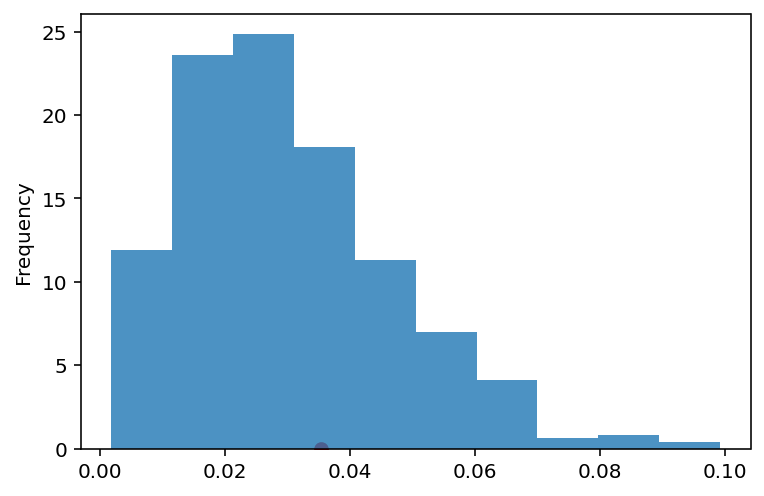

In [41]:
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

In [42]:
np.count_nonzero(tvds > observed_tvd) / len(tvds)

0.336

Here we get a p-value of ~0.364 which is greater than 0.05, thus we can not reject the null hypothesis.\
There is no connection between the missingness of CUSTOMERS.AFFECTED and CLIMATE.CATEGORY.

### Hypothesis Test

Question:see if there is a correlation between urban areas and outage duration

Null Hypothesis: The urban and rural areas are part of the same distribution

Alternative Hypothesis: Urban areas tend to have longer outages than rural areas. 

In [43]:
 
uout_duration

,OUTAGE.DURATION,IS_URBAN
1,3060,False
2,1,False
3,3000,False
4,2550,False
5,1740,False
...,...,...
1526,870,False
1529,220,False
1530,720,False
1532,59,False


Start by finding the average duration in rural and urban areas

In [44]:
# avg outage durations in rural and urban areas. 
uout_duration=uout_duration[uout_duration["OUTAGE.DURATION"]>10]
avg_outages = uout_duration.groupby('IS_URBAN').mean()
avg_outages

,OUTAGE.DURATION
IS_URBAN,
False,3340.918004
True,2801.980392


Calculate the observed difference

In [45]:
obsv_diff = avg_outages.diff().iloc[-1,0]
obsv_diff


-538.9376114081997

Example of one simulation

In [47]:
# shuffle outage durations 
shuffle_od = uout_duration['OUTAGE.DURATION'].sample(replace=False, frac=1).reset_index(drop=True)
df_with_shuffled = (uout_duration.assign(**{'Shuffled Outage Durations': shuffle_od}))
# we are adding a column with shuffled durations, this is one simulation
df_with_shuffled.head(5)

,OUTAGE.DURATION,IS_URBAN,Shuffled Outage Durations
1,3060,False,563.0
3,3000,False,1620.0
4,2550,False,70.0
5,1740,False,245.0
6,1860,False,485.0


Simulate 500 times to check if null hypothesis holds true

In [48]:
# run simulation 500 times 
num_repetitions = 1000
# add mean difference vals in list
diff_mean = []
for i in range(num_repetitions): 
    # shuffle outage duration values
    shuffle_od = uout_duration['OUTAGE.DURATION'] .sample(replace=False, frac=1) .reset_index(drop=True)
    shuffle_df = uout_duration.assign(**{'Shuffled Outage Durations': shuffle_od})

    # calculate diff in means
    mean_agg =shuffle_df.groupby('IS_URBAN').mean().loc[:,'Shuffled Outage Durations']
    difference = mean_agg.diff().iloc[-1]
    diff_mean.append(difference)

Plot the diff mean values

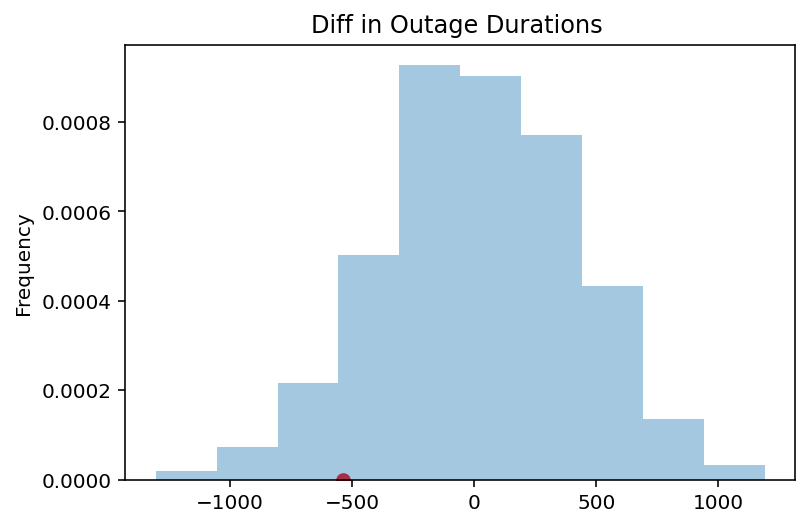

In [49]:
#plot differences
title_diff = 'Diff in Outage Durations ' 
pd.Series(diff_mean ).plot(kind='hist',density=True,title=title_diff,alpha=0.4)
plt.scatter(obsv_diff,0,color='red',s=40)

In [50]:
#calculate pval 
p_val_outages = np.count_nonzero(diff_mean<=obsv_diff) / num_repetitions
p_val_outages

0.083

In [51]:
""" p val is 0.084 which is greater than 0.05
meaning that we failed to reject the null hypothesis."""

' p val is 0.084 which is greater than 0.05\nmeaning that we failed to reject the null hypothesis.'

In [2]:
export PATH=$PATH=/Library/TeX/texbin
python -m jupyter nbconvert --to pdf outages.ipynb

SyntaxError: invalid syntax (<ipython-input-2-005d27bc0cc0>, line 1)

     |████████████████████████████████| 77 kB 2.7 MB/s eta 0:00:011
     |████████████████████████████████| 145 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.8 MB/s eta 0:00:01
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61084 sha256=6df00edf5eb811bf8e923b928a7c5a98c3c857784f72af37158fe7cd884ad5a5
  Stored in directory: /Users/srikarprayaga/Library/Caches/pip/wheels/b1/1a/8f/a4c34be976825a2f7948d0fa40907598d69834f8ab5889de11
Successfully built PyPDF2
Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (<ipython-input-1-aedefdd210e4>, line 1)